In [1]:
from skimage import data
from skimage.feature import Cascade

trained_file = data.lbp_frontal_face_cascade_filename()
print(trained_file)

/root/.cache/scikit-image/0.18.3/data/../data/lbpcascade_frontalface_opencv.xml


In [2]:
with open(trained_file) as f:
    data = f.read()
    
print(data[:500])

<?xml version="1.0"?>
<!--
number of positive samples 3000
number of negative samples 1500
-->
<opencv_storage>
<cascade type_id="opencv-cascade-classifier">
  <stageType>BOOST</stageType>
  <featureType>LBP</featureType>
  <height>24</height>
  <width>24</width>
  <stageParams>
    <boostType>GAB</boostType>
    <minHitRate>0.9950000047683716</minHitRate>
    <maxFalseAlarm>0.5000000000000000</maxFalseAlarm>
    <weightTrimRate>0.9500000000000000</weightTrimRate>
    <maxDepth>1</maxDepth>
    


In [3]:
detector = Cascade(trained_file)
#print(dir(detector))
#detector.detect_multi_scale?

In [4]:
patches.Rectangle?

Object `patches.Rectangle` not found.


In [5]:
# https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.Cascade
# Returns
# outputlist of dicts
# Dict have form {‘r’: int, ‘c’: int, ‘width’: int, ‘height’: int}, where ‘r’ represents row position of top left corner of detected window, ‘c’ - col position, ‘width’ - width of detected window, ‘height’ - height of detected window.

In [6]:
# 利用LAB的函數抓取 ANDY 相片
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np, ast
from skimage import data
from skimage.feature import Cascade
from matplotlib import patches


def show_image(image, title='Image', cmap_type='gray', interpolation=None):
    plt.imshow(image, cmap=cmap_type)    
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    #crop_face(result, detected)
    plt.show()    
        

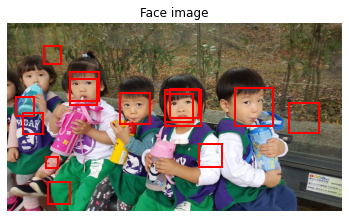

In [9]:
img = plt.imread('groups.jpg')

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = img,
                                       scale_factor=1.2,
                                       step_ratio=0.55,
                                       min_size=(10, 10),
                                       max_size=(280, 280))
show_detected_face(img, detected)